### EDA and feature engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [ ]:
df = pd.read_csv("../data/processed/taiwan_credit_cleaned.csv")

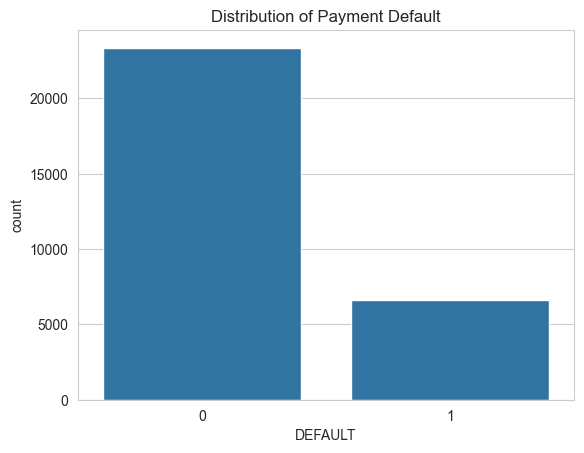

In [4]:
sns.countplot(x="DEFAULT", data=df)
plt.title("Distribution of Payment Default")
plt.show()

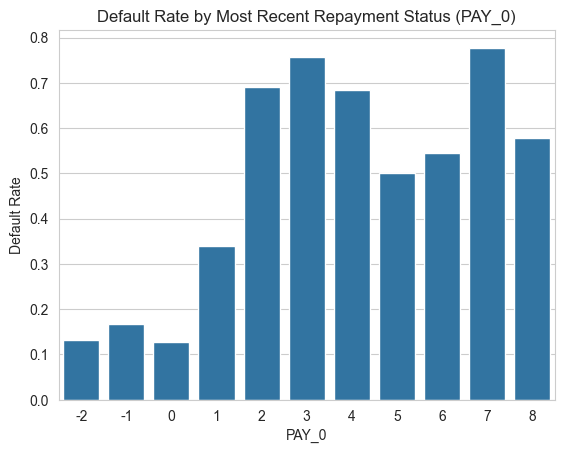

In [5]:
# repayment behavior analysis
# default rate vs most recent repayment status (PAY_0)
# Negative repayment status values (−1 and −2) correspond to non-delinquent states, while positive values indicate increasing months of payment delay.
default_by_pay0 = (
    df.groupby("PAY_0")["DEFAULT"]
      .mean()
      .reset_index()
)

sns.barplot(x="PAY_0", y="DEFAULT", data=default_by_pay0)
plt.title("Default Rate by Most Recent Repayment Status (PAY_0)")
plt.ylabel("Default Rate")
plt.show()


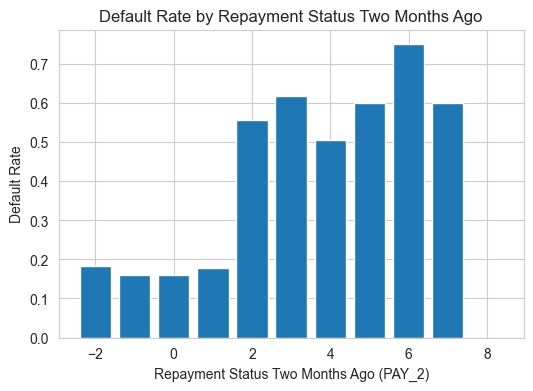

In [6]:
default_by_pay2 = (
    df.groupby("PAY_2")["DEFAULT"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(6,4))
plt.bar(default_by_pay2["PAY_2"], default_by_pay2["DEFAULT"])
plt.xlabel("Repayment Status Two Months Ago (PAY_2)")
plt.ylabel("Default Rate")
plt.title("Default Rate by Repayment Status Two Months Ago")
plt.show()


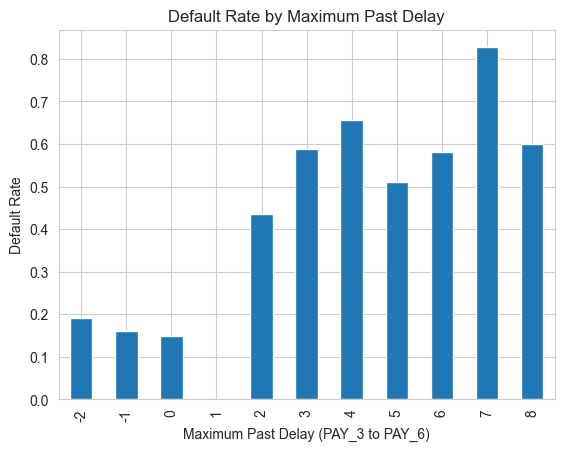

In [7]:
df["MAX_PAST_DELAY"] = df[["PAY_3","PAY_4","PAY_5","PAY_6"]].max(axis=1)
df.groupby("MAX_PAST_DELAY")["DEFAULT"].mean().plot(kind="bar")
plt.xlabel("Maximum Past Delay (PAY_3 to PAY_6)")
plt.ylabel("Default Rate")
plt.title("Default Rate by Maximum Past Delay")
plt.show()

Older repayment statuses show similar but weaker patterns than PAY_0.

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\1022665154.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("LIMIT_BAL_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))


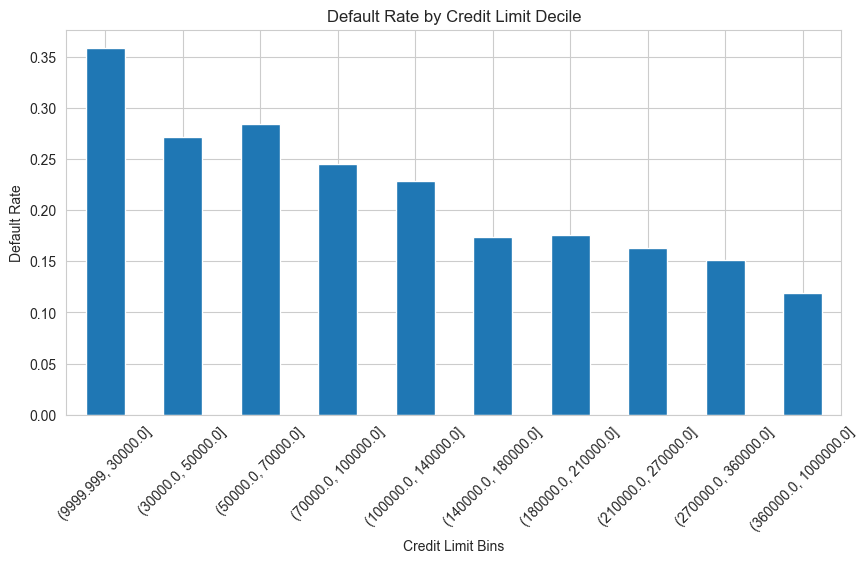

In [8]:
# credit exposure and financial capacity analysis
# credit limit vs default rate
df["LIMIT_BAL_BIN"] = pd.qcut(df["LIMIT_BAL"], q = 10)
df.groupby("LIMIT_BAL_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))
plt.xlabel("Credit Limit Bins")
plt.ylabel("Default Rate")
plt.title("Default Rate by Credit Limit Decile")
plt.xticks(rotation=45)
plt.show()

Customers with lower credit limits exhibit higher default rates, indicating that credit limit captures underlying financial capacity and risk.

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\2284706527.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("PAY_AMT1_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))


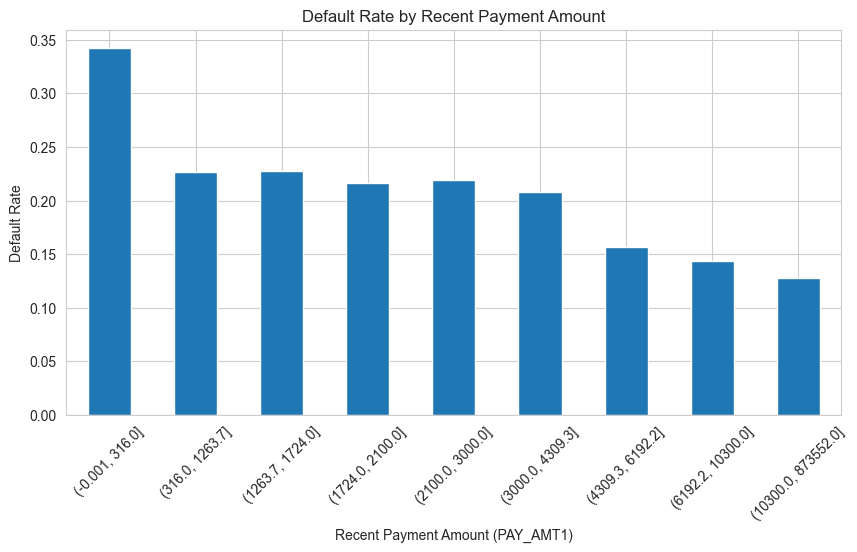

In [9]:
# recent payment amount vs default rate
df["PAY_AMT1_BIN"] = pd.qcut(df["PAY_AMT1"], q=10, duplicates='drop')
df.groupby("PAY_AMT1_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))
plt.xlabel("Recent Payment Amount (PAY_AMT1)")
plt.ylabel("Default Rate")
plt.title("Default Rate by Recent Payment Amount")
plt.xticks(rotation=45)
plt.show()

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\3622172577.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("TOTAL_PAY_AMT_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))


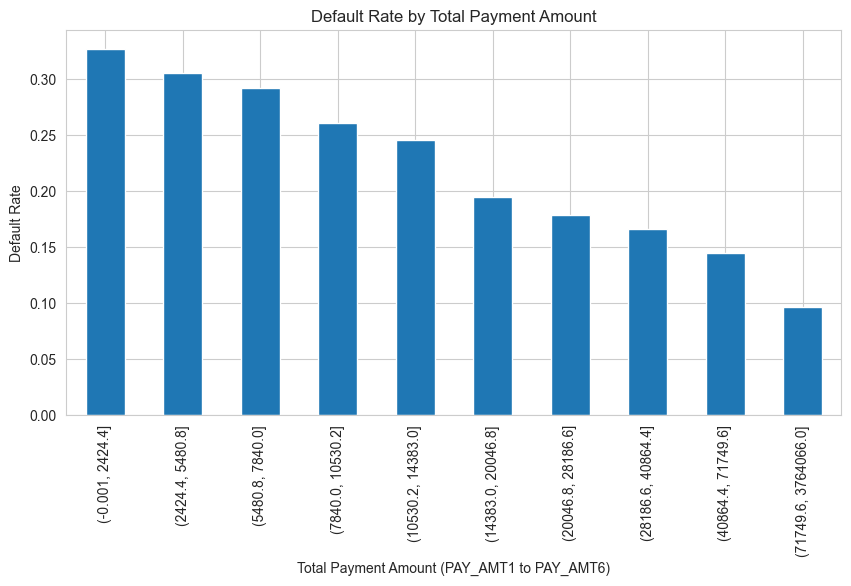

In [10]:

df["TOTAL_PAY_AMT"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].sum(axis=1)
df["TOTAL_PAY_AMT_BIN"] = pd.qcut(df["TOTAL_PAY_AMT"], q=10, duplicates='drop')
df.groupby("TOTAL_PAY_AMT_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))
plt.xlabel("Total Payment Amount (PAY_AMT1 to PAY_AMT6)")
plt.ylabel("Default Rate")
plt.title("Default Rate by Total Payment Amount")
plt.show()

Default rates decrease as payment amounts increase. Customers who make consistently higher payments across recent months exhibit substantially lower default risk, indicating that repayment capacity and liquidity play an important role in short-term credit card delinquency.

PAY_AMT could indicate ability or willingness to pay

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\241998427.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("BILL_AMT_TOTAL_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))


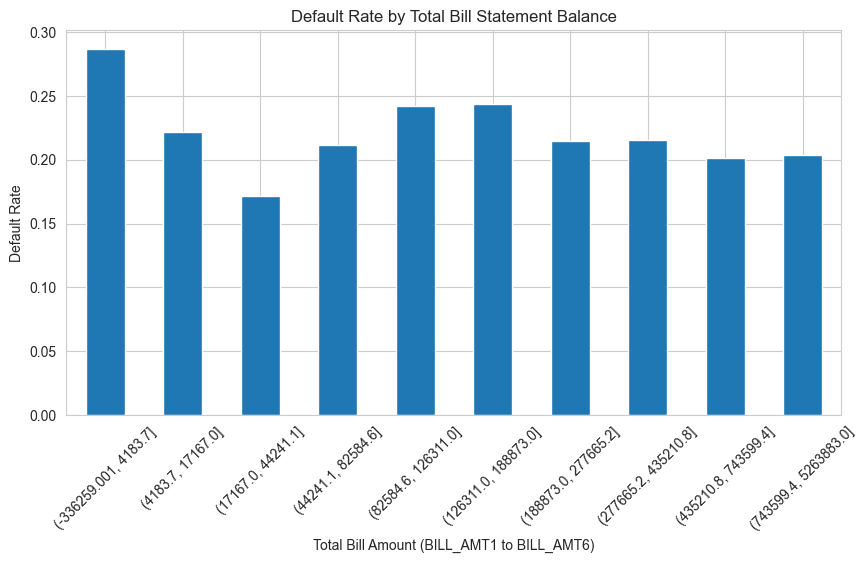

In [11]:
# bill statement amount vs default rate
df["BILL_AMT_TOTAL"] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis=1)
df["BILL_AMT_TOTAL_BIN"] = pd.qcut(df["BILL_AMT_TOTAL"], q=10, duplicates='drop')
df.groupby("BILL_AMT_TOTAL_BIN")["DEFAULT"].mean().plot(kind="bar", figsize=(10,5))
plt.xlabel("Total Bill Amount (BILL_AMT1 to BILL_AMT6)")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.title("Default Rate by Total Bill Statement Balance")
plt.show()

Negative statement balances arise from overpayments or account credits, indicating that the customer has paid more than the outstanding balance. These values are economically meaningful and are therefore retained.

The relationship between total statement balance and payment default is non-monotonic. Customers with very low balances exhibit relatively high default rates, while those with higher balances do not necessarily default more frequently. This suggests that outstanding balance alone is insufficient to characterise default risk in credit card data, as it reflects both exposure and customer creditworthiness.

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\1266391196.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("UTIL_BIN")["DEFAULT"].mean().plot(kind="bar")


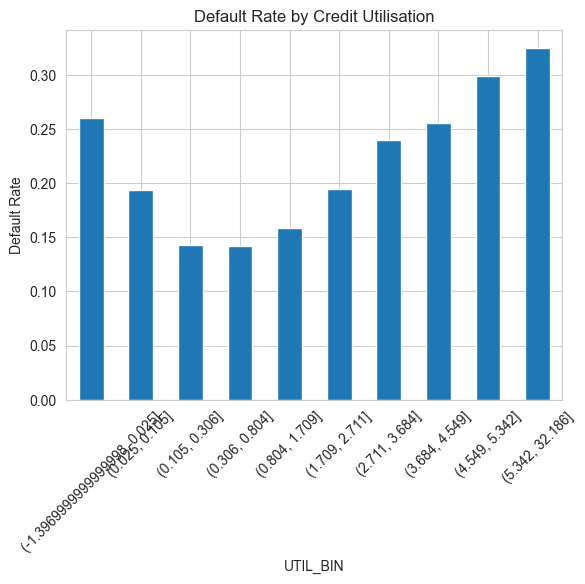

In [12]:
df["UTILISATION"] = df["BILL_AMT_TOTAL"] / df["LIMIT_BAL"]
df["UTIL_BIN"] = pd.qcut(df["UTILISATION"], 10, duplicates="drop")
df.groupby("UTIL_BIN")["DEFAULT"].mean().plot(kind="bar")
plt.title("Default Rate by Credit Utilisation")
plt.xticks(rotation=45)
plt.ylabel("Default Rate")
plt.show()

Credit utilisationw which is defined as the ratio of total statement balance to credit limit, exhibits a clear positive relationship with payment default. Customers with low utilisation show the lowest default rates, while default risk increases steadily as utilisation rises. This indicates that relative debt burden, rather than absolute balance alone, is a more informative indicator of short-term credit card default risk.

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\908325214.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AGE_BIN")["DEFAULT"].mean().plot(kind="bar")


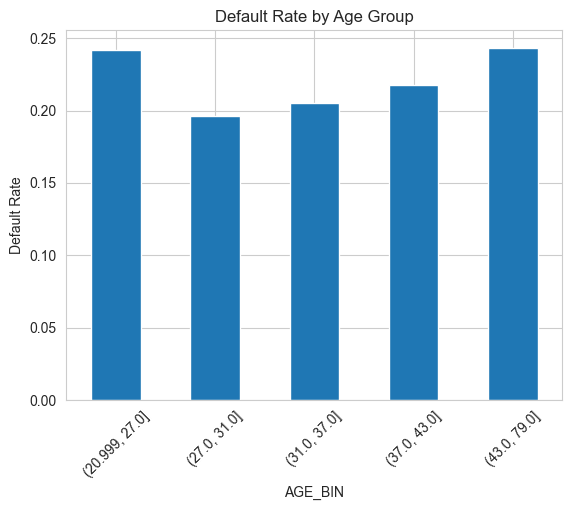

In [13]:
# demographic factors analysis
# age vs default rate
df["AGE_BIN"] = pd.qcut(df["AGE"], q=5)
df.groupby("AGE_BIN")["DEFAULT"].mean().plot(kind="bar")
plt.title("Default Rate by Age Group")
plt.xticks(rotation=45)
plt.ylabel("Default Rate")
plt.show()

The relationship between age and payment default is non-monotonic, with higher default rates among younger and older customers and lower rates in middle-aged groups. Overall, age shows weaker predictive power than repayment and financial variables.

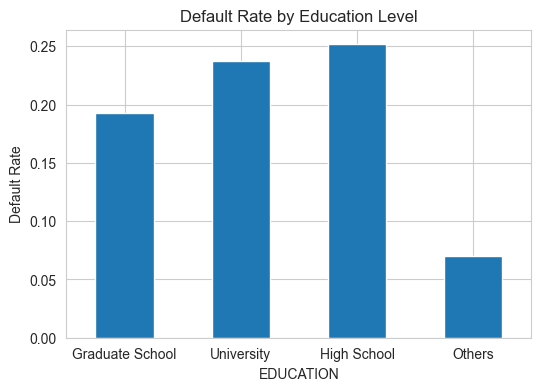

In [14]:
edu_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others"
}
edu_default = df.groupby("EDUCATION")["DEFAULT"].mean()
edu_default.plot(kind="bar", figsize=(6,4))
plt.title("Default Rate by Education Level")
plt.ylabel("Default Rate")
plt.xticks(
    ticks=range(len(edu_default)),
    labels=[edu_labels[i] for i in edu_default.index],
    rotation=0
)
plt.show()


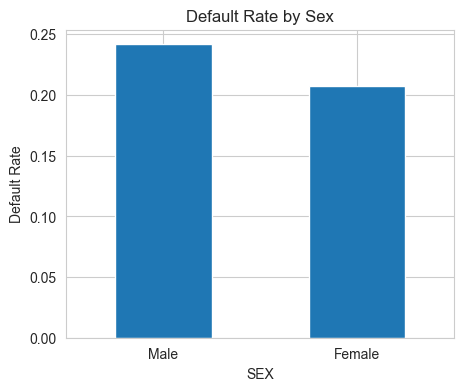

In [15]:
sex_labels = {
    1: "Male",
    2: "Female"
}
sex_default = df.groupby("SEX")["DEFAULT"].mean()
sex_default.plot(kind="bar", figsize=(5,4))
plt.title("Default Rate by Sex")
plt.ylabel("Default Rate")
plt.xticks(
    ticks=range(len(sex_default)),
    labels=[sex_labels[i] for i in sex_default.index],
    rotation=0
)
plt.show()


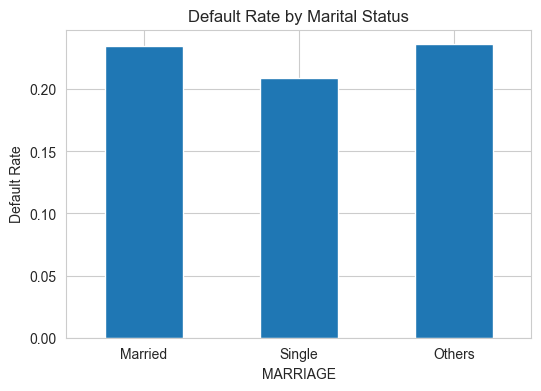

In [16]:
marriage_labels = {
    1: "Married",
    2: "Single",
    3: "Others"
}
marriage_default = df.groupby("MARRIAGE")["DEFAULT"].mean()
marriage_default.plot(kind="bar", figsize=(6,4))
plt.title("Default Rate by Marital Status")
plt.ylabel("Default Rate")
plt.xticks(
    ticks=range(len(marriage_default)),
    labels=[marriage_labels[i] for i in marriage_default.index],
    rotation=0
)
plt.show()


Overall, demographic variables show weaker correlation with payment default than repayment behaviour, credit utilisation, and recent payment activity.

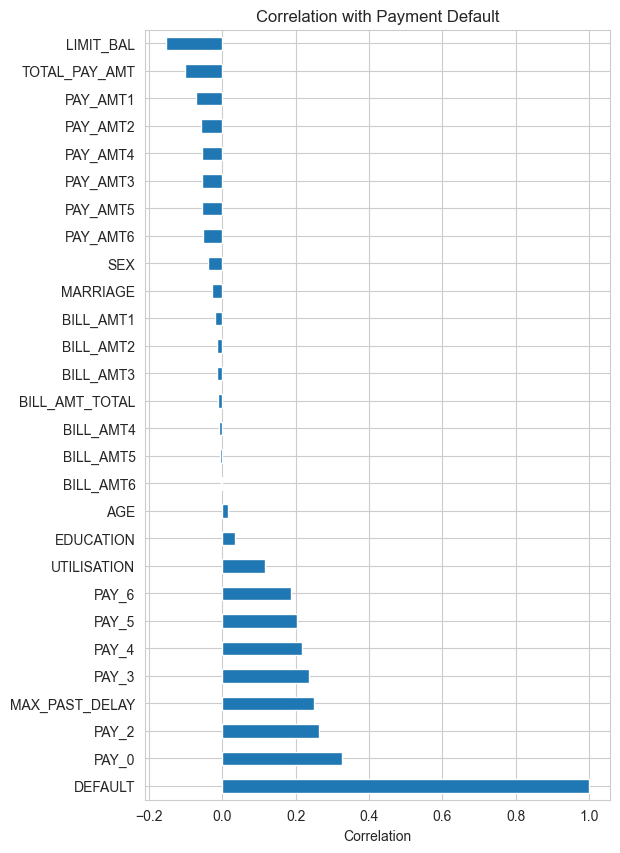

In [17]:
# correlation with default
corr_default = (
    df.corr(numeric_only=True)["DEFAULT"]
      .sort_values(ascending=False)
)
plt.figure(figsize=(6,10))
corr_default.plot(kind="barh")
plt.title("Correlation with Payment Default")
plt.xlabel("Correlation")
plt.show()


Repayment status variables show the strongest correlation with payment default, followed by credit utilisation and recent payment behaviour. Demographic variables exhibit weaker correlations, consistent with earlier EDA findings

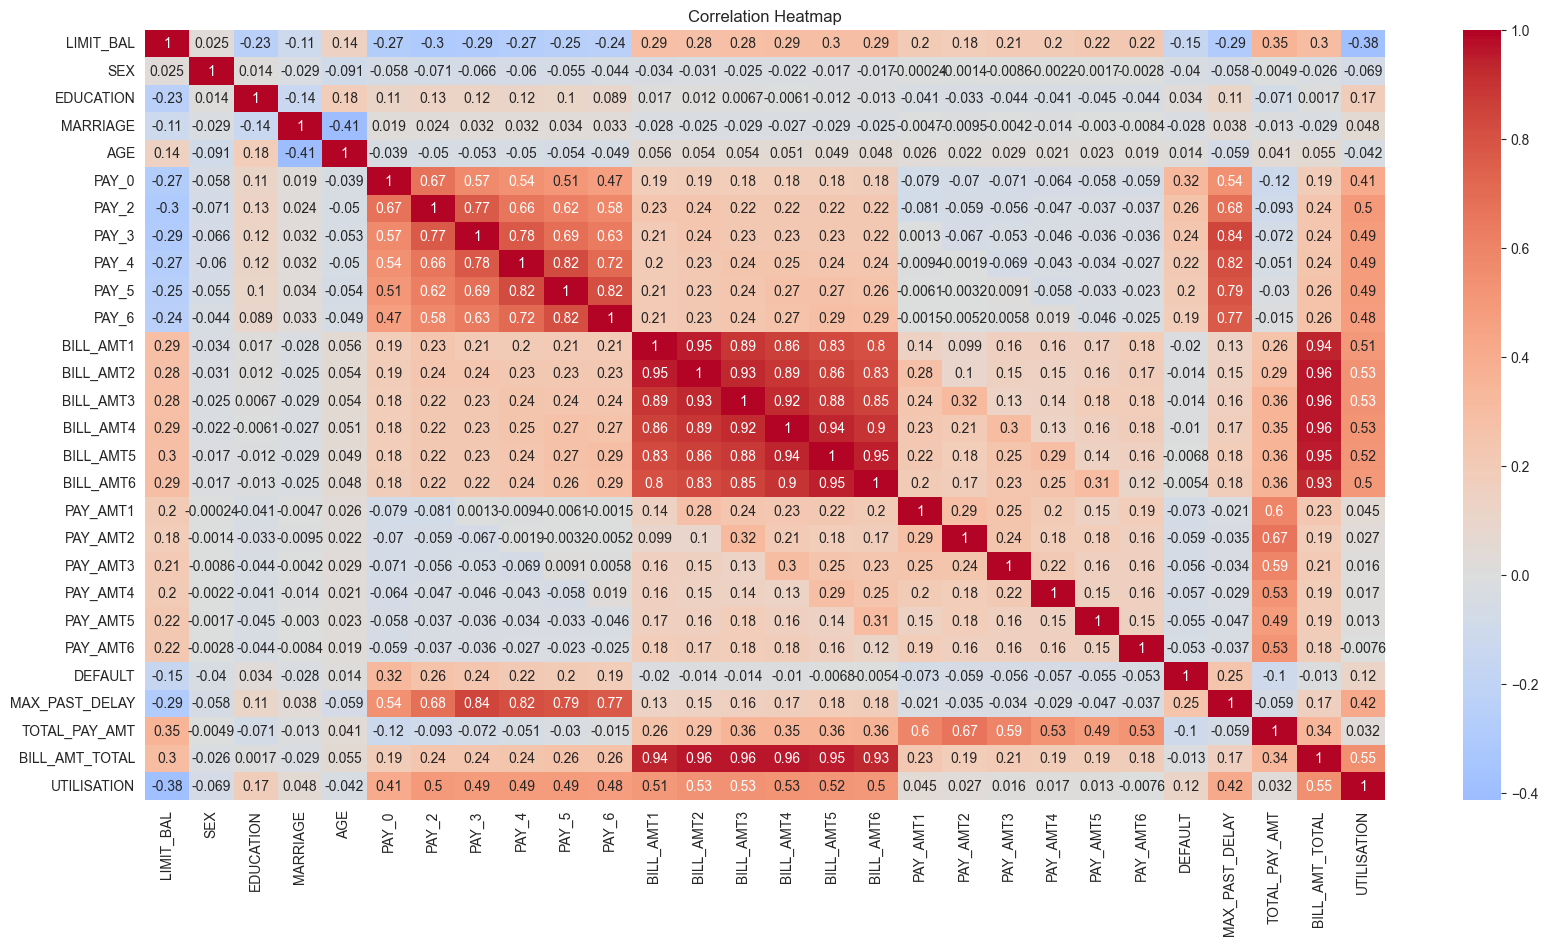

In [18]:
# Correlation heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

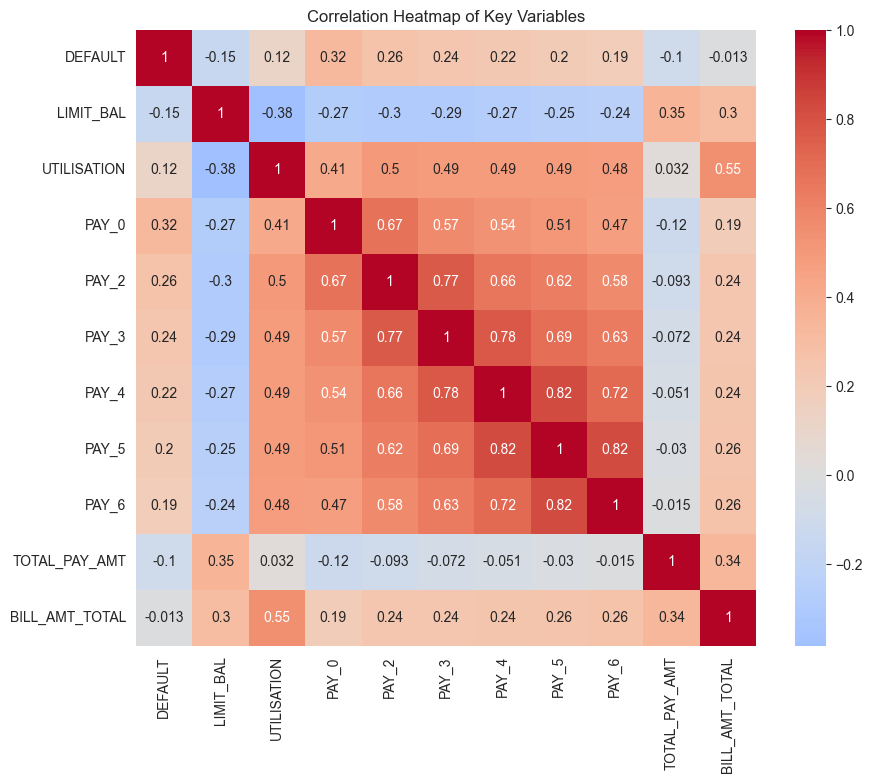

In [19]:
corr_cols = [
    "DEFAULT",
    "LIMIT_BAL",
    "UTILISATION",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "TOTAL_PAY_AMT",
    "BILL_AMT_TOTAL"
]
corr_matrix1 = df[corr_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix1, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Key Variables")
plt.show()


C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\390689702.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["UTILISATION"], bins=50)


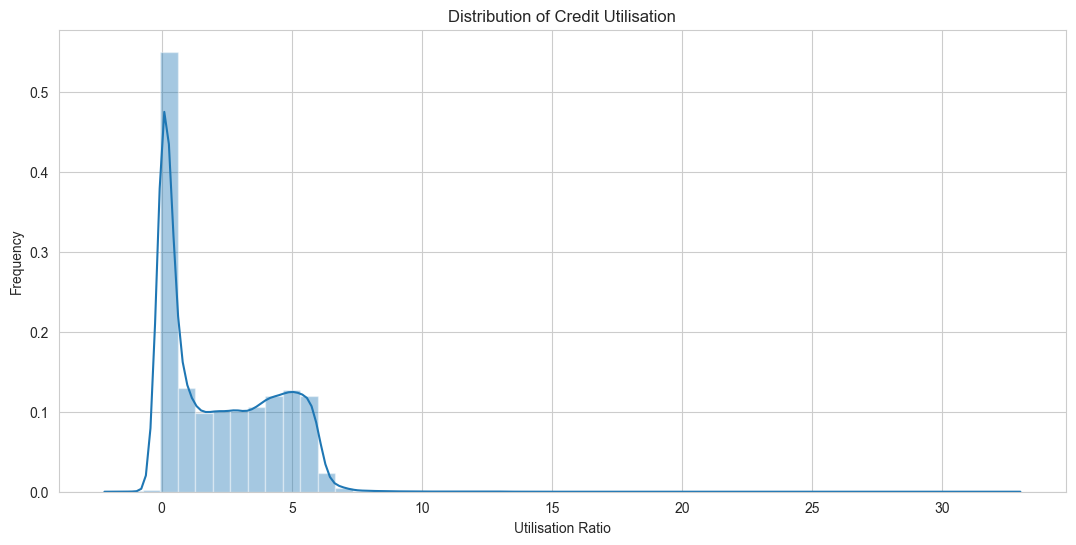

In [46]:
# distribution plots
plt.figure(figsize = (13,6))
sns.distplot(df["UTILISATION"], bins=50)
plt.title("Distribution of Credit Utilisation")
plt.xlabel("Utilisation Ratio")
plt.ylabel("Frequency")
plt.show()
# Most customers use little to none of their available credit.

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\2638819325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LIMIT_BAL"], kde = True, bins=200)


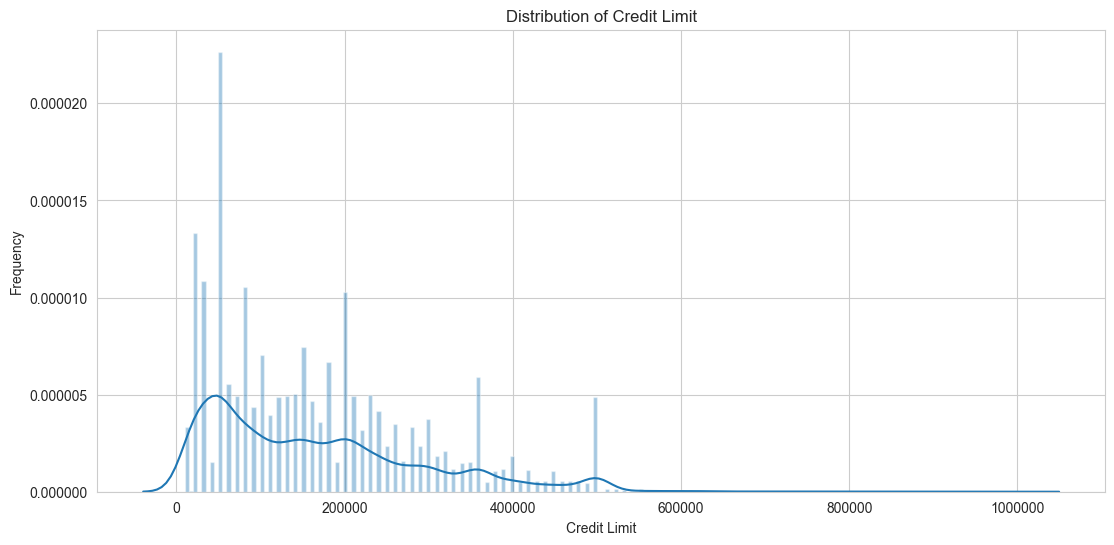

In [44]:
plt.figure(figsize = (13,6))
sns.distplot(df["LIMIT_BAL"], kde = True, bins=200)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.show()

C:\Users\cheng\AppData\Local\Temp\ipykernel_31640\546203215.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["TOTAL_PAY_AMT"], bins=50)


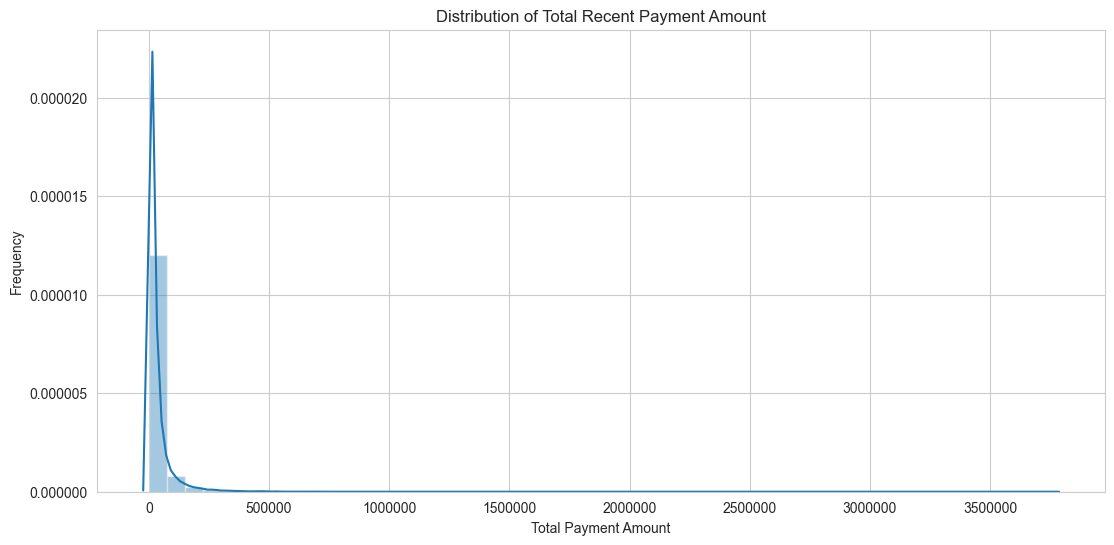

In [45]:
plt.figure(figsize = (13,6))
sns.distplot(df["TOTAL_PAY_AMT"], bins=50)
plt.title("Distribution of Total Recent Payment Amount")
plt.xlabel("Total Payment Amount")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.show()

The distribution of total recent payment amount is highly right-skewed, with most customers making relatively small payments and a small number exhibiting very large lump-sum repayments.

Strong correlations among repayment status variables across different months. Payment and bill amount variables are also correlated. These patterns indicate potential multicollinearity among repayment-related features.

In [ ]:
# feature engineering
# max past delay
df["MAX_PAST_DELAY"] = df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].max(axis=1) # worst historical behavior

In [27]:
# Payment-to-Bill Ratio
df["PAYMENT_TO_BILL_RATIO"] = df["TOTAL_PAY_AMT"] /(df["BILL_AMT_TOTAL"] + 1) # +1 to avoid division by zero)

In [ ]:
# standard deviation of payment amounts across months
df["PAY_AMT_STD"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].std(axis=1)
df["PAY_AMT_STD"].describe() #skewed with many low values and few high values


count     30000.000000
mean       5804.918519
std       15006.438973
min           0.000000
25%         615.353672
50%        1413.694125
75%        4126.957632
max      650098.338820
Name: PAY_AMT_STD, dtype: float64

In [47]:
drop_cols = [
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"
]
df1 = df.drop(columns=drop_cols)

In [34]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'DEFAULT',
       'MAX_PAST_DELAY', 'LIMIT_BAL_BIN', 'PAY_AMT1_BIN', 'TOTAL_PAY_AMT',
       'TOTAL_PAY_AMT_BIN', 'BILL_AMT_TOTAL', 'BILL_AMT_TOTAL_BIN',
       'UTILISATION', 'UTIL_BIN', 'AGE_BIN', 'MIN_PAST_DELAY',
       'PAYMENT_TO_BILL_RATIO', 'PAY_AMT_STD'],
      dtype='object')

In [ ]:
model_cols = [
    "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
    "MAX_PAST_DELAY",
    "TOTAL_PAY_AMT", "BILL_AMT_TOTAL",
    "UTILISATION", "PAYMENT_TO_BILL_RATIO",
    "PAY_AMT_STD",
    "DEFAULT"
]    # engineered features: MAX_PAST_DELAY, "TOTAL_PAY_AMT", "BILL_AMT_TOTAL", "UTILISATION", "PAYMENT_TO_BILL_RATIO", "PAY_AMT_STD" are included
df_model = df1[model_cols].copy()


In [49]:
df_model.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,MAX_PAST_DELAY,TOTAL_PAY_AMT,BILL_AMT_TOTAL,UTILISATION,PAYMENT_TO_BILL_RATIO,PAY_AMT_STD,DEFAULT,MEAN_PAST_DELAY
0,20000,2,2,1,24,2,689,7704,0.385200,0.089422,281.283072,1,-0.333333
1,120000,2,2,2,26,2,5000,17077,0.142308,0.292774,752.772653,1,0.500000
2,90000,2,2,2,34,0,11018,101653,1.129478,0.108387,1569.815488,0,0.000000
3,50000,2,2,1,37,0,8388,231334,4.626680,0.036259,478.058155,0,0.000000
4,50000,1,2,1,57,0,59049,109339,2.186780,0.540049,13786.230736,0,-0.333333


In [38]:
df_model.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'MAX_PAST_DELAY',
       'TOTAL_PAY_AMT', 'BILL_AMT_TOTAL', 'UTILISATION',
       'PAYMENT_TO_BILL_RATIO', 'PAY_AMT_STD', 'DEFAULT'],
      dtype='object')

In [ ]:
df_model.to_csv("../data/processed/taiwan_credit_model_data.csv", index=False)
